In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Snaking the column names

In [4]:
customer_df.columns = customer_df.columns.str.lower()
        
customer_df.columns = customer_df.columns.str.replace(' ','_')

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Date format :

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [6]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### We don't have any nulls

In [59]:
customer_df.isnull().sum()

number_of_open_complaints         0
number_of_policies                0
month                             0
day                               0
customer_lifetime_value           0
income                            0
monthly_premium_auto              0
months_since_last_claim           0
months_since_policy_inception     0
total_claim_amount                0
response                          0
coverage                          0
employmentstatus                  0
vehicle_size                      0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
education_College                 0
education_High School or Below    0
education_Higher Education        0
gender_M                          0
marital_status_Married            0
marital_status_Single             0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_L2                         0
policy_L3                   

In [8]:
customer_df['months_since_policy_inception'].value_counts()

59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

### Separating numerical into discrete and continuous

In [9]:
# I decided that columns that had less than 10 unique values where discrete based on the columns that we have

In [10]:
numerical = customer_df.select_dtypes(np.number)

discrete_lst = []
continuous_lst = []

for col in numerical.columns:
        if len(customer_df[col].unique())<=10 :
            discrete_lst.append(col)
        else :
            continuous_lst.append(col)

print(discrete_lst)
print(continuous_lst)

discrete = customer_df.filter(discrete_lst).copy()
discrete.head()

continuous = customer_df[continuous_lst]
continuous.head()

['number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [11]:
discrete.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [12]:
categorical = customer_df.select_dtypes(object)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Checking the categorical data : its A-ok :)        (all values are unique and meaningful)

In [13]:
def is_unique(categoricals):
    for col in categoricals.columns:
        if len(categoricals[col].unique())<=10:
            print(col,(categoricals[col].unique()))
    return

is_unique(categorical)

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [14]:
# droping customer id because it's useless basically

In [15]:
categorical = categorical.drop('customer', axis=1)
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Look : a beautiful correlation matrix and its heatmap !

In [16]:
corrMatrix = numerical.corr()
corrMatrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


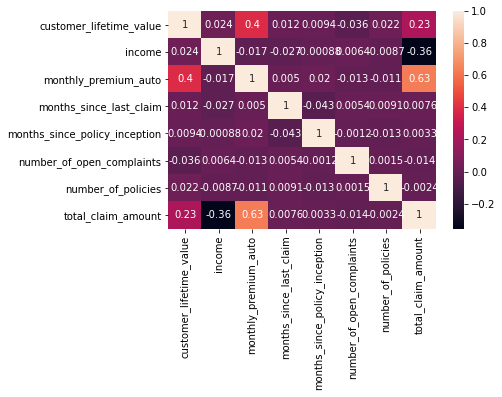

In [17]:
sns.heatmap(corrMatrix, annot=True, )
plt.show()

In [18]:
# no high correlation that we would want to drop

### Create a function to plot every discrete variables.

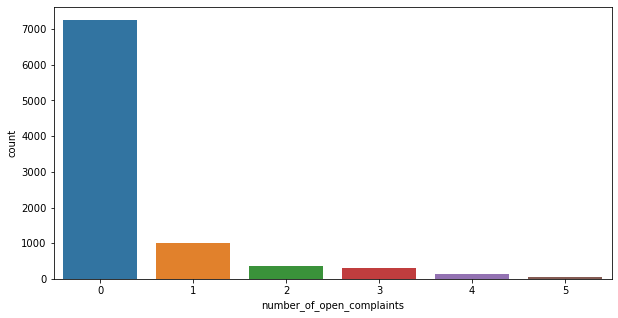

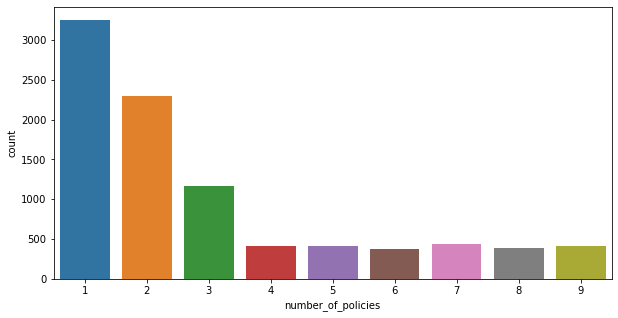

In [19]:
 for col in discrete.columns :    
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, data=discrete)
    plt.show()    

### Create a function to plot every continuous variables.

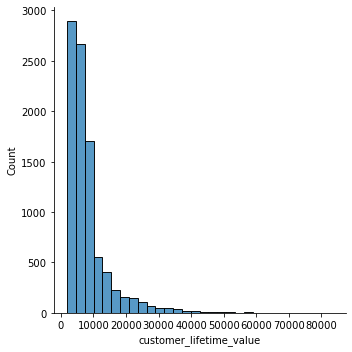

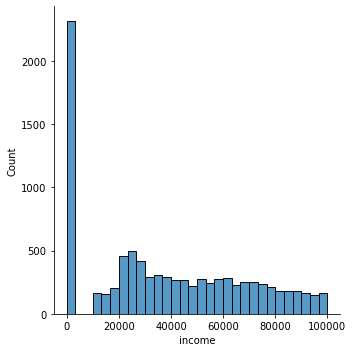

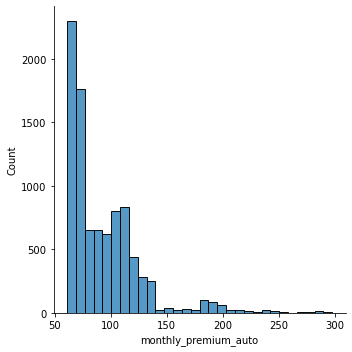

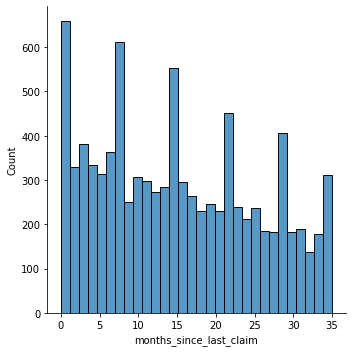

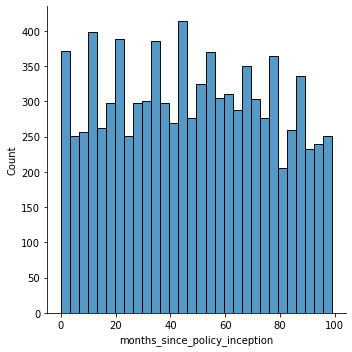

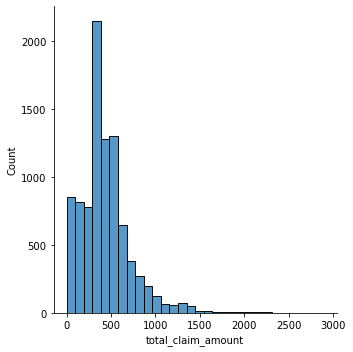

In [20]:
for data in continuous.columns :
    sns.displot(continuous[data], bins=30)
    plt.show()

### Create a function to plot every categorical variables.

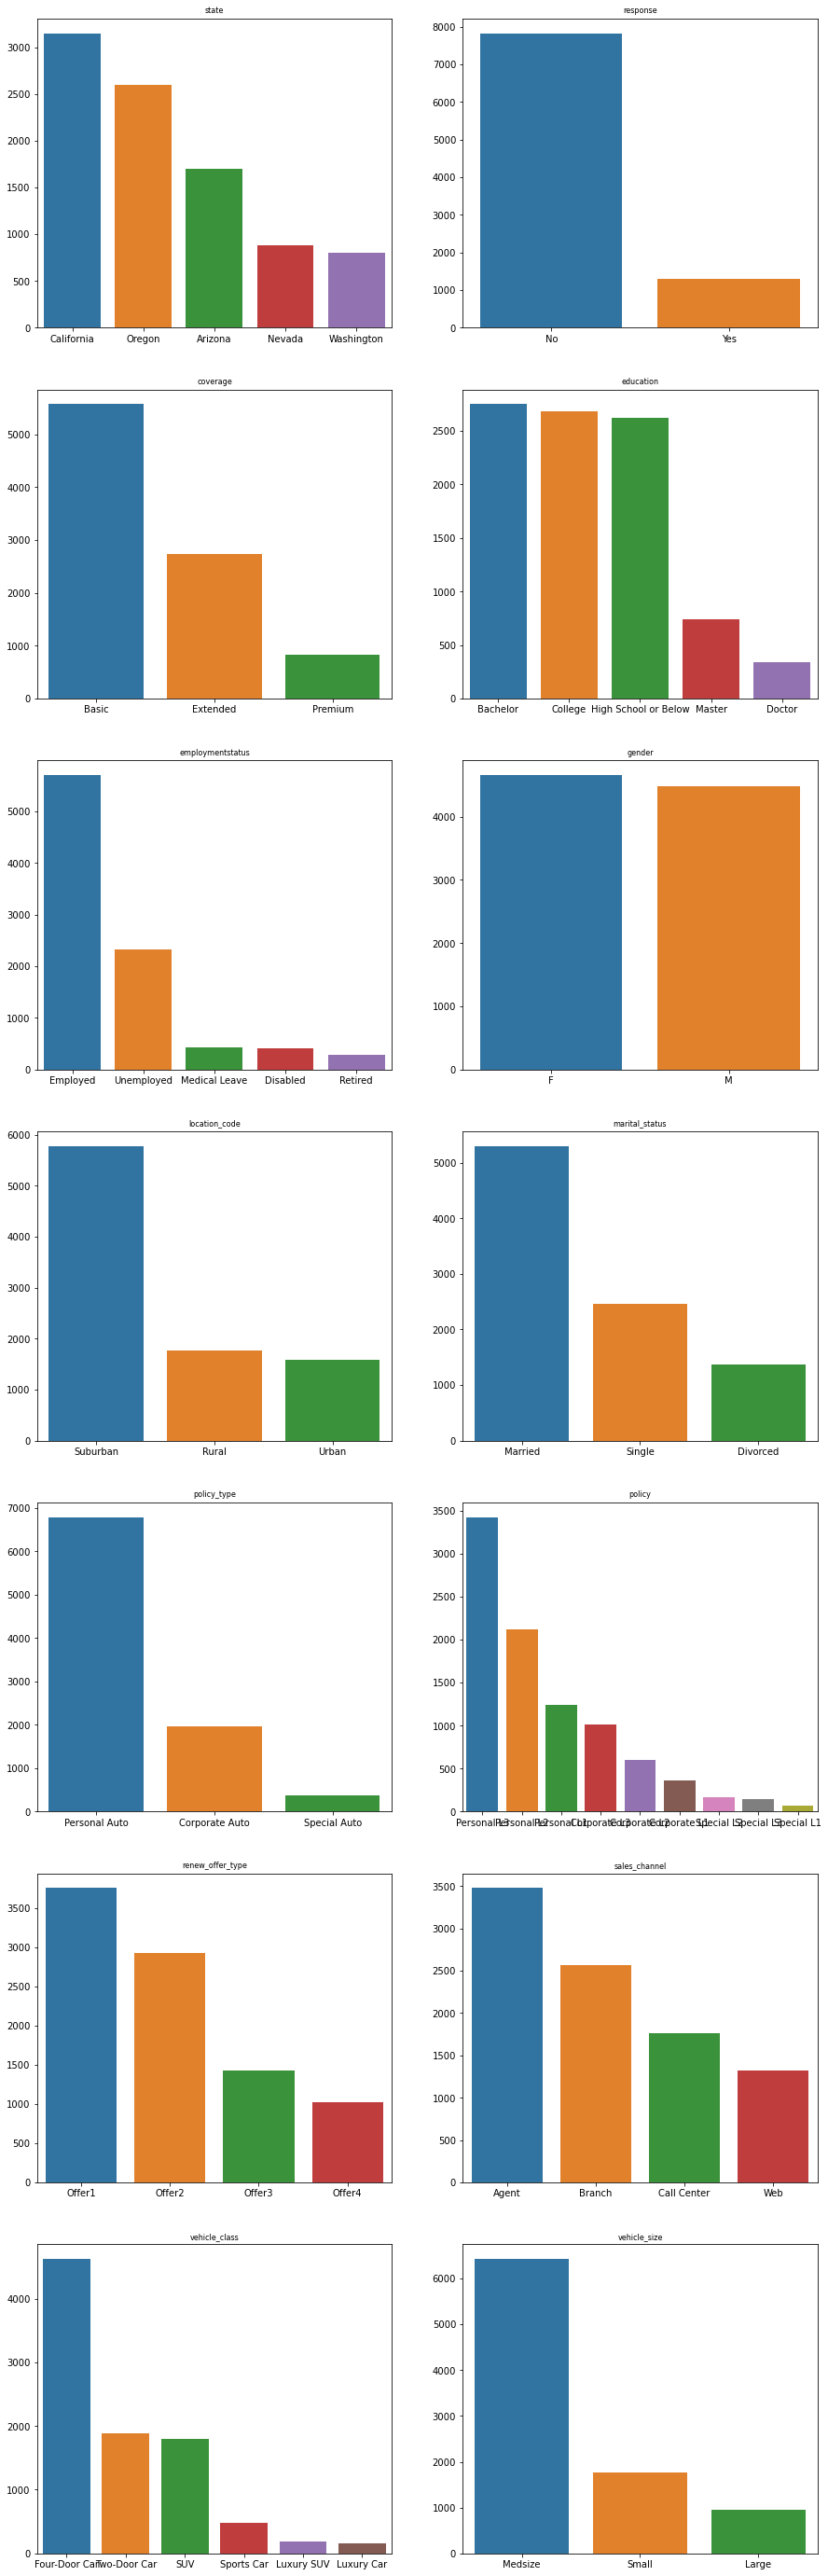

In [21]:
f, axes = plt.subplots(int(categorical.shape[1]/2),2, figsize =(15,50))
for i, col in enumerate(categorical):
    sns.barplot(x=categorical[col].value_counts().index,
                y= categorical[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
    axes[int(i/2)][int(i)%2].set_title(col,fontsize = 8)
    axes[int(i/2)][int(i)%2].set_ylabel('')

In [22]:
### Now on to cleaning the categorical variables : bringing some values together and creating a boolean for others

In [23]:
categorical['response'] = np.where(categorical['response'] == 'Yes', 1, 0)

In [24]:
def clean_employmentstatus(x) :
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x
    
categorical['employmentstatus'] = categorical['employmentstatus'].apply(clean_employmentstatus)

<AxesSubplot:ylabel='employmentstatus'>

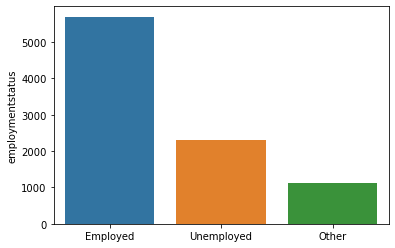

In [25]:
sns.barplot(x=categorical['employmentstatus'].value_counts().index,
                y= categorical['employmentstatus'].value_counts())

In [26]:
def clean_policy(x) :
    if 'L1' in x :
        return 'L1'
    elif 'L2' in x :
        'L2' in x
        return 'L2'
    else :
        return'L3'
    
categorical['policy'] = categorical['policy'].apply(clean_policy)

<AxesSubplot:ylabel='policy'>

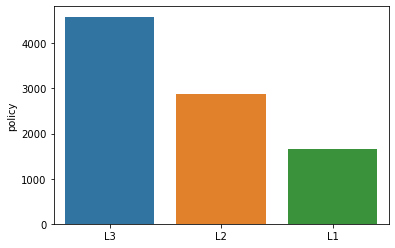

In [27]:
sns.barplot(x=categorical['policy'].value_counts().index,
                y= categorical['policy'].value_counts())

In [28]:
def clean_class(x) :
    if x in ['Sports Car','Luxury SUV', 'Luxury Car']:
        return 'Sport/Luxury'
    else:
        return x
    
categorical['vehicle_class'] = categorical['vehicle_class'].apply(clean_class)

<AxesSubplot:ylabel='vehicle_class'>

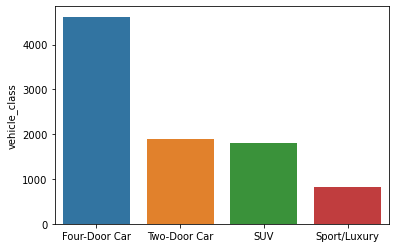

In [29]:
sns.barplot(x=categorical['vehicle_class'].value_counts().index,
                y= categorical['vehicle_class'].value_counts())

<AxesSubplot:ylabel='education'>

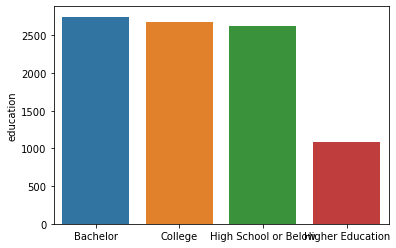

In [30]:
def clean_education(x) :
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x
    
categorical['education'] = categorical['education'].apply(clean_education)

sns.barplot(x=categorical['education'].value_counts().index,
                y= categorical['education'].value_counts())

### Showing outliers

customer_lifetime_value


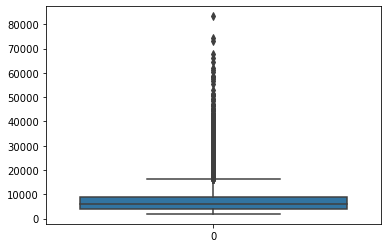

income


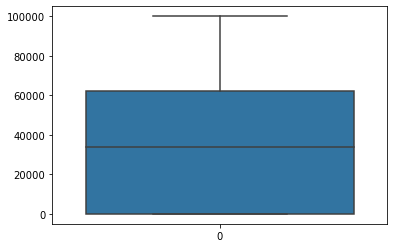

monthly_premium_auto


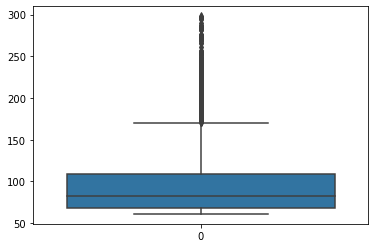

months_since_last_claim


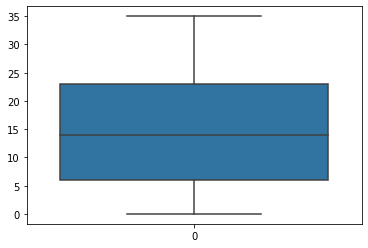

months_since_policy_inception


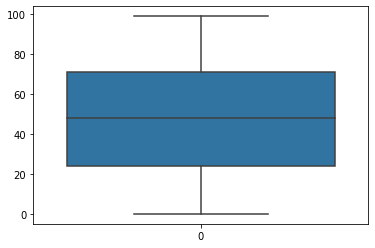

total_claim_amount


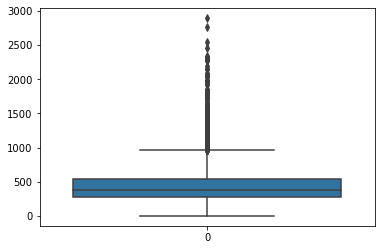

In [31]:
for col in continuous.columns :
    sns.boxplot(data = continuous[col])
    print(col)
    plt.show()


In [32]:
# I will take out outliers from 'customer_lifetime_value','monthly_premium_auto' and 'total claim amount' after concatenating

# Tuesday's labs

#### Date

In [33]:
import datetime

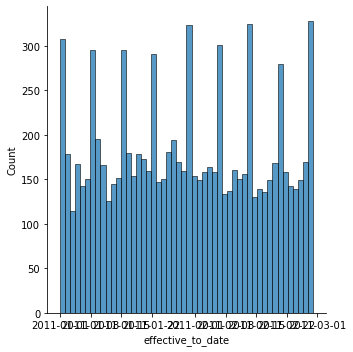

In [34]:
sns.displot(customer_df['effective_to_date'], bins=50)
plt.show()

In [35]:
# doesn't show much so i'm going to extract month and day of the week

In [36]:
discrete['month'] = customer_df['effective_to_date'].dt.month
discrete.head()

,number_of_open_complaints,number_of_policies,month
0,0,1,2
1,0,8,1
2,0,2,2
3,0,7,1
4,0,1,2


In [37]:
discrete['day'] = customer_df['effective_to_date'].dt.weekday
discrete.head()

,number_of_open_complaints,number_of_policies,month,day
0,0,1,2,3
1,0,8,1,0
2,0,2,2,5
3,0,7,1,3
4,0,1,2,3


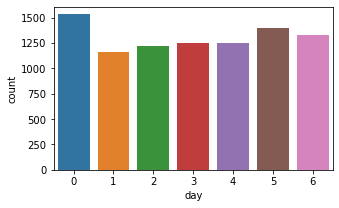

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(x = discrete['day'], data=customer_df)
plt.show() 

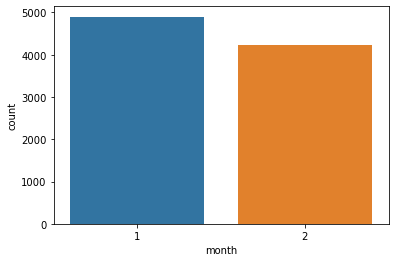

In [39]:
sns.countplot(x = discrete['month'], data=customer_df)
plt.show() 

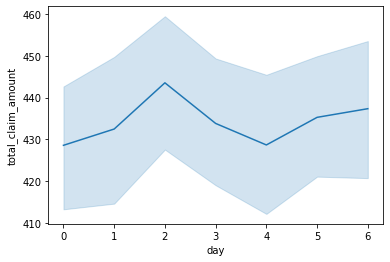

In [40]:
sns.lineplot(x = discrete.day, y = customer_df.total_claim_amount)
plt.show() 

In [41]:
# could be interesting i guess ?

### Normalizing continuous

In [42]:
from sklearn.preprocessing import MinMaxScaler
con_normalized = pd.DataFrame(MinMaxScaler().fit_transform(continuous), columns=continuous.columns)
con_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710
...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.238876


### Encoding categorical variables

-One hot to state

-Ordinal to coverage

-Ordinal to employmentstatus

-Ordinal to location code

-One hot to policy type

-One hot to policy

-One hot to renew offercustomer_df

-One hot to sales channel

-One hot vehicle class

-Ordinal vehicle size

In [43]:
categorical["coverage"] = categorical["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [44]:
categorical["employmentstatus"] = categorical["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Other" : 2})

In [45]:
categorical["location_code"] = categorical["location_code"].map({"Urban" : 0, "Suburban" : 1, "Rural" : 2})

In [46]:
categorical["vehicle_size"] = categorical["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

### Looking for relationships

Find out if there is a relationship between the following categorical columns using Chi-Squared: 

education - vehicle_size

location_code - coverage


Comment on what the presence (or not) of this relationship means for your dataset and if there are any steps you should take.

In [47]:
ed_vs_crosstab = pd.crosstab(categorical['education'], categorical['vehicle_size'])

In [48]:
import scipy.stats as st
st.chi2_contingency(ed_vs_crosstab)

(9.05114185247539,
 0.17072225294620436,
 6,
 array([[ 530.7063718 , 1932.68578936,  284.60783884],
        [ 517.7670243 , 1885.56426538,  277.66871031],
        [ 506.37267353, 1844.06919203,  271.55813444],
        [ 209.15393037,  761.68075323,  112.1653164 ]]))

In [49]:
# H0 = no relationship but p_value is high (>0.05) ==> we can't reject H0
# ==> we have no evidence to back up a potential relationship between education and vehicle_size (seems logical)

In [50]:
lc_cov_crosstab = pd.crosstab(categorical['location_code'], categorical['coverage'])
st.chi2_contingency(lc_cov_crosstab)

(31.269751775273015,
 2.696989413473808e-06,
 4,
 array([[ 964.3722356 ,  474.91175827,  142.71600613],
        [3522.82373549, 1734.83884388,  521.33742063],
        [1080.8040289 ,  532.24939785,  159.94657324]]))

In [51]:
# p_value is very low so we can reject H0 ==> we have evidence to back up the relationship between location code and coverage
# the presence of a relationship means we can drop 

In [52]:
categorical = categorical.drop('location_code', axis =1)

#### One hot encoding

In [53]:
cat_encoded = pd.get_dummies(categorical, drop_first=True)
cat_encoded.head()

,response,coverage,employmentstatus,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_High School or Below,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sport/Luxury,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating final dataframe

In [54]:
customer = pd.concat([discrete, con_normalized, cat_encoded], axis =1)
customer.head()

,number_of_open_complaints,number_of_policies,month,day,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sport/Luxury,vehicle_class_Two-Door Car
0,0,1,2,3,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,...,1,0,0,0,0,0,0,0,0,1
1,0,8,1,0,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,...,1,0,1,0,0,0,0,0,0,0
2,0,2,2,5,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,...,1,0,0,0,0,0,0,0,0,1
3,0,7,1,3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,...,0,0,0,0,0,1,0,1,0,0
4,0,1,2,3,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,...,0,0,0,0,0,0,0,0,0,0


### Getting rid of outliers

In [55]:
iqr = np.percentile(customer['customer_lifetime_value'],75) - np.percentile(customer['customer_lifetime_value'],25)
upper_limit = np.percentile(customer['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
customer = customer[customer['customer_lifetime_value'] < upper_limit]

0.178269685121011


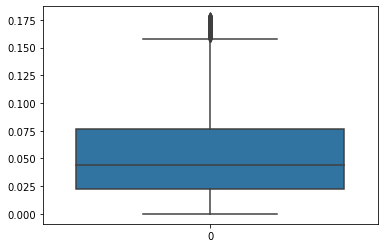

In [56]:
sns.boxplot(data = customer['customer_lifetime_value'])
plt.show()

0.4409282700421941


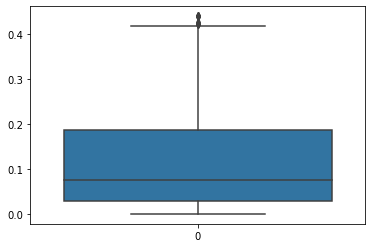

In [57]:
iqr = np.percentile(customer['monthly_premium_auto'],75) - np.percentile(customer['monthly_premium_auto'],25)
upper_limit = np.percentile(customer['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)
customer = customer[customer['monthly_premium_auto'] < upper_limit]
sns.boxplot(data = customer['monthly_premium_auto'])
plt.show()

0.319241512479156


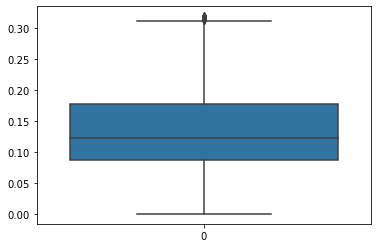

In [58]:
iqr = np.percentile(customer['total_claim_amount'],75) - np.percentile(customer['total_claim_amount'],25)
upper_limit = np.percentile(customer['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)
customer = customer[customer['total_claim_amount'] < upper_limit]
sns.boxplot(data = customer['total_claim_amount'])
plt.show()